In [3]:
import random as rd
import numpy as np
import time
import scipy as sc

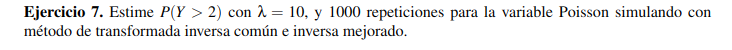

La funcion de probabilidad de masa de una Poisson es:
$$P(X=k)=\frac{e^{-\lambda}\lambda^k}{k!}$$

Y las probabilidades cumplen una relacion de recurrencia entre ellas, donde:
$$
p_0 = e^{-\lambda}, \quad p_{k+1} = p_{k} \frac{\lambda}{k+1}
$$

por lo que el metodo se puede escribir de la siguiente manera

In [7]:
def transf_inv_poisson(lamda):
    u = rd.random()
    i = 0
    p = np.exp(-lamda)
    F = p

    while u >= F:
        i += 1
        p *= lamda / i
        F += p
    
    return i

def simulacion_a(nsims, lamda):
    return [transf_inv_poisson(lamda) for i in range(nsims)]

Esto chequea desde 0 en adelante, pero en las poisson tenemos que los valores mas probabes son los mas cercanos a $\lambda$. Entonces partiremos buscando desde ahi y luego de manera ascendente o descendente segun el u.

In [18]:
def transf_inv_poisson_mejorada(lamda):
    p = np.exp(-lamda)
    F = p
    for j in range(1, int(lamda)+1):
        p *= lamda / j
        F += p
    # establezo la acomulacion de probabilidad en la prob de lamda
    u = rd.random()

    if u >= F: # si el valor generado es mayor que esa probabilidad de lamda, 
               # entonces debo seguir buscando hacia arriba.
        j = int(lamda) + 1
        while u >= F:
            p *= lamda / j
            F += p
            j += 1
        return j -1
    else: # el valor generado era menor que la probabilidad de lamda
        j = int(lamda)
        while u < F:
            F -= p
            p *= j / lamda
            j -= 1
        return j+1
    
def simulacion_b(nsims, lamda):
    return [transf_inv_poisson_mejorada(lamda) for i in range(nsims)]

In [19]:
nsims = 10000
lamda = 10

# quiero estimar la probabilidad P(Y > 2) con ambos metodos

# metodo a (sin mejora)
start = time.time()
Y_a = simulacion_a(nsims, lamda)
end = time.time()
print("Tiempo de ejecucion metodo a: ", end - start)
prob_a = sum([1 for y in Y_a if y > 2]) / nsims
print(f"Probabilidad estimada con metodo sin mejora: {prob_a}")
# metodo b (con mejora)
start = time.time()
Y_b = simulacion_b(nsims, lamda)
end = time.time()
print("Tiempo de ejecucion metodo b: ", end - start)
prob_a_b = sum([1 for y in Y_b if y > 2]) / nsims
print(f"Probabilidad estimada con metodo con mejora: {prob_a_b}")

Tiempo de ejecucion metodo a:  0.03959989547729492
Probabilidad estimada con metodo sin mejora: 0.9973
Tiempo de ejecucion metodo b:  0.03066086769104004
Probabilidad estimada con metodo con mejora: 0.9963
